In [53]:
!pip install geopy
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
!pip install openpyxl
from geopy.geocoders import Nominatim
!pip install geopandas
import geopandas as gpd

 # Analyzing Electoral Integrity: A Data-Driven Investigation of Potential Vote Manipulation in Bulgaria

# Theoretical Background

## 1. Data Cleaning and Preprocessing

**Importance**:  
Data cleaning is essential in preparing the datasets for accurate analysis. In your project, this involves handling election results data and potentially other related datasets, which may contain errors, missing values, or irrelevant columns that need to be addressed to ensure the integrity of the analysis.

**Techniques**:  
- **Dropping Unnecessary Columns**: In your notebook, several columns were dropped due to unexpected formats or entirely missing values. This step is crucial to focus on the relevant data.
- **Handling Bad Lines**: The use of the `on_bad_lines='skip'` parameter when reading CSV files helps to bypass rows with issues, ensuring the dataset remains consistent and error-free.
- **Splitting and Cleaning Columns**: Some columns may contain multiple pieces of information that need to be split into separate columns, or patterns within the data that require cleaning for better analysis.

## 2. Data Transformation

**Mapping IDs to Descriptive Labels**:  
Your project involves replacing IDs (such as `GenderID`) with more descriptive labels (e.g., 'Male', 'Female'). This transformation makes the data more understandable and easier to analyze, particularly when preparing data for visualization or reporting.

**Normalization**:  
Although not explicitly covered in your notebook, normalization could involve converting or standardizing data formats (such as dates or numerical values) to ensure consistency across the dataset.

## 3. Data Aggregation

**Purpose**:  
Aggregation in your project is used to summarize the election and unemployment data. This is done by grouping data based on key categories like `Gender` and `Residence`, allowing you to analyze patterns across different segments.

**Techniques**:  
- **Grouping and Summing**: Your notebook shows how data is grouped by categories (e.g., `GenderID`, `Residence`) and then summed to provide aggregate insights, such as the total number of unemployed persons in a specific quarter.
- **Visualization Preparation**: Aggregating data in this way is often a precursor to visualizing it, making trends and patterns more evident.

## 4. Data Filtering

**Purpose**:  
Filtering is used to focus on specific subsets of data that are relevant to your analysis. For example, filtering the unemployment data to only include records from the fourth quarter of 2023 allows for a more targeted analysis.

**Techniques**:  
- **Conditional Filtering**: In your notebook, you filter data based on specific conditions, such as selecting rows where the `Year` is 2023 and the `Quarter` is Q4. This helps isolate the data you need for particular analyses.

## 5. Data Visualization

**Purpose**:  
Visualization is crucial in your project for communicating the results of your data analysis. By visualizing aggregated data, you can effectively convey insights about the unemployment rate or election results across different demographic groups.

**Types of Visualizations**:  
- **Bar Charts**: In your notebook, bar charts are used to compare unemployment data across different categories (e.g., gender and residence). This type of visualization is effective for showing differences between groups.
- **Additional Visualizations**: Depending on the data and insights you wish to convey, you might consider other types of visualizations, such as line charts for trends over time or pie charts for showing proportions.

# Theoretical Background: Vote Manipulation Data Analysis

## 1. Introduction to Vote Manipulation Analysis

**Importance**:  
Vote manipulation analysis is crucial in ensuring the integrity of election results. This analysis involves detecting and understanding anomalies, patterns, or irregularities in voting data that might indicate fraudulent activities or errors. The goal is to identify inconsistencies that could suggest manipulation, such as unusual voting patterns, discrepancies between reported and actual votes, or irregular distribution of votes among candidates.

**Common Issues in Vote Data**:
- **Duplicate Votes**: Instances where the same vote might be counted multiple times.
- **Unusual Patterns**: Anomalies in voting patterns, such as abnormally high support for a candidate in certain regions without a plausible explanation.
- **Discrepancies in Reported Data**: Differences between official results and those reported by independent observers or media.

## 2. Data Cleaning and Preprocessing in Vote Manipulation Analysis

**Handling Incomplete or Incorrect Data**:  
Election data often comes with its challenges, such as missing information or inconsistent formats. Cleaning this data involves:
- **Removing Duplicates**: Ensuring each vote or record is unique to prevent inflated results.
- **Standardizing Data Formats**: Making sure that all data entries (e.g., timestamps, candidate names) follow a consistent format.

**Filtering Irrelevant Data**:  
Filtering is essential to focus on the relevant subset of data. For example, you might want to exclude results from regions with very low voter turnout or where data is incomplete, as these can skew the analysis.

## 3. Detecting and Analyzing Voting Patterns

**Statistical Analysis**:  
Statistical methods can be used to detect anomalies in voting patterns:
- **Z-Scores**: This can be used to identify outliers in the data. For example, if a candidate received an unusually high number of votes in a particular precinct compared to others, this might be highlighted as an outlier.
- **Benford's Law**: This principle suggests that in naturally occurring datasets, certain digits appear more frequently as leading digits. Deviations from Benford’s Law in voting data can be an indicator of manipulation.

**Geospatial Analysis**:  
Mapping voting data geographically using tools like `Geopandas` can help visualize where anomalies occur. For instance, unusual clustering of votes for a particular candidate in specific regions might suggest targeted vote manipulation.

## 4. Data Aggregation for Vote Analysis

**Purpose**:  
Aggregating voting data allows for the analysis of overall trends and identification of irregular patterns across different levels of aggregation (e.g., by precinct, district, or region).

**Techniques**:  
- **Group by Region**: Aggregating votes by region helps in identifying areas with unusually high or low turnout, or regions where one candidate significantly outperformed others.
- **Time-Based Aggregation**: If time-series data is available, aggregating votes over time can reveal suspicious spikes in vote counts, indicating potential ballot stuffing.

## 5. Visualization in Vote Manipulation Analysis

**Purpose**:  
Visualizations are key in vote manipulation analysis, as they can make complex data more accessible and highlight potential issues that may not be immediately apparent in raw data.

**Types of Visualizations**:
- **Heatmaps**: Useful for showing the distribution of votes across regions. A heatmap can quickly reveal areas with disproportionately high support for a candidate.
- **Bar Charts**: Can compare the number of votes received by different candidates across regions, helping to spot anomalies.
- **Line Charts**: If analyzing voting over time, line charts can illustrate irregularities in the timing of vote counting.

## 6. Case Studies and Applications

**Real-World Applications**:  
Vote manipulation analysis has been crucial in various elections around the world, helping to ensure the legitimacy of results. Techniques like those mentioned above have been used to challenge election results, leading to recounts or even new elections.

**Lessons Learned**:  
Understanding the types of manipulations that have been detected in the past can help in designing better detection strategies for future elections. Common indicators include statistical anomalies, irregularities in voter turnout, and suspicious voting patterns that defy logical explanations.

**Ethical Considerations**:  
When conducting vote manipulation analysis, it is important to ensure that the methods used are transparent and that the results are communicated clearly and responsibly. Misinterpretation or miscommunication of the findings could undermine public confidence in the electoral process.
``


In [18]:
import pandas as pd

# Define file paths
file_paths = {
    'parties': r'C:\stasi\SoftUni_DATA_SCIENCE\FINAL_PROJECT\DATA\РЕЗУЛТАТИ ИЗБОРИ 2024\export\Актуализирана база данни - НС\cik_parties_09.06.2024.csv',
    'candidates': r'C:\stasi\SoftUni_DATA_SCIENCE\FINAL_PROJECT\DATA\РЕЗУЛТАТИ ИЗБОРИ 2024\export\Актуализирана база данни - НС\local_candidates_09.06.2024.csv',
    'local_parties': r'C:\stasi\SoftUni_DATA_SCIENCE\FINAL_PROJECT\DATA\РЕЗУЛТАТИ ИЗБОРИ 2024\export\Актуализирана база данни - НС\local_parties_09.06.2024.csv',
    'preferences': r'C:\stasi\SoftUni_DATA_SCIENCE\FINAL_PROJECT\DATA\РЕЗУЛТАТИ ИЗБОРИ 2024\export\Актуализирана база данни - НС\preferences_09.06.2024.csv',
    'protocols': r'C:\stasi\SoftUni_DATA_SCIENCE\FINAL_PROJECT\DATA\РЕЗУЛТАТИ ИЗБОРИ 2024\export\Актуализирана база данни - НС\protocols_09.06.2024.csv',
    'sections': r'C:\stasi\SoftUni_DATA_SCIENCE\FINAL_PROJECT\DATA\РЕЗУЛТАТИ ИЗБОРИ 2024\export\Актуализирана база данни - НС\sections_09.06.2024.csv',
    'votes': r'C:\stasi\SoftUni_DATA_SCIENCE\FINAL_PROJECT\DATA\РЕЗУЛТАТИ ИЗБОРИ 2024\export\Актуализирана база данни - НС\votes_09.06.2024.csv'
}

# Load all datasets with semicolon as delimiter
data_dict = {}
for key, path in file_paths.items():
    try:
        data_dict[key] = pd.read_csv(path, delimiter=';', engine='python', on_bad_lines='skip')
    except pd.errors.ParserError as e:
        print(f"Error loading {key}: {e}")

# Display information about each dataset
for key, df in data_dict.items():
    print(f"\n--- {key.upper()} DATA ---\n")
    print(df.info())
    print(df.head())


--- PARTIES DATA ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   1                   30 non-null     int64 
 1   ПП ИМА ТАКЪВ НАРОД  30 non-null     object
dtypes: int64(1), object(1)
memory usage: 612.0+ bytes
None
   1                                 ПП ИМА ТАКЪВ НАРОД
0  2                                    ПП ГЛАС НАРОДЕН
1  3                                      СИНЯ БЪЛГАРИЯ
2  4  НИЕ ГРАЖДАНИТЕ /БЪЛГАРСКАТА ПРОЛЕТ, КОЙ, БРСП,...
3  6                 ПОЛИТИЧЕСКА ПАРТИЯ БЪЛГАРСКИ ГЛАСЪ
4  7                                 КОАЛИЦИЯ НА РОЗАТА

--- CANDIDATES DATA ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7603 entries, 0 to 7602
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   1                            7603 

# Explanation of Code

## 1. Importing the Pandas Library

The code begins by importing the `pandas` library, which is essential for data manipulation and analysis in Python.

```python
import pandas as pd

In [19]:
# Load the dataset again with some manual cleaning
protocols_df = pd.read_csv( r'C:\stasi\SoftUni_DATA_SCIENCE\FINAL_PROJECT\DATA\РЕЗУЛТАТИ ИЗБОРИ 2024\export\Актуализирана база данни - НС\protocols_09.06.2024.csv', delimiter=';', engine='python', on_bad_lines='skip')

# Drop the problematic columns (e.g., columns with unexpected formats or entirely NaN values)
protocols_df_cleaned = protocols_df.drop(columns=['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 8', 'Unnamed: 9'])

# Check if the column with the repeated patterns can be split into multiple columns or if it should be removed
if '|' in protocols_df_cleaned.columns[3]:
    # If this is the case, you might want to drop or process it
    protocols_df_cleaned = protocols_df_cleaned.drop(columns=[protocols_df_cleaned.columns[3]])

# Display the cleaned DataFrame info and first few rows
print(protocols_df_cleaned.info())
print(protocols_df_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12975 entries, 0 to 12974
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   26         12975 non-null  int64  
 1   010100001  12975 non-null  int64  
 2   1          12975 non-null  int64  
 3   600        12975 non-null  int64  
 4   608        12975 non-null  int64  
 5   4          12975 non-null  int64  
 6   296        12975 non-null  int64  
 7   450        12975 non-null  int64  
 8   1.1        12975 non-null  int64  
 9   149        12975 non-null  int64  
 10  12         12975 non-null  int64  
 11  3          12975 non-null  int64  
 12  134        12975 non-null  int64  
 13  147        9600 non-null   float64
 14  7          9600 non-null   float64
 15  140        9600 non-null   float64
dtypes: float64(3), int64(13)
memory usage: 1.6 MB
None
   26  010100001  1  600  608  4  296  450  1.1  149  12  3  134    147     7  \
0  26   10100002  1  500  540  3  

## Explanation of Code

### 1. Loading the Protocols CSV File

The first step in the code is to load a CSV file containing election protocols data into a Pandas DataFrame. The file is located at a specific path, and the CSV is read using a semicolon (`;`) as the delimiter. The `engine='python'` parameter is used to handle the file parsing, which is particularly useful for complex files. The `on_bad_lines='skip'` parameter ensures that any problematic lines in the file are skipped during the loading process.

```python
protocols_df = pd.read_csv( r'C:\stasi\SoftUni_DATA_SCIENCE\FINAL_PROJECT\DATA\РЕЗУЛТАТИ ИЗБОРИ 2024\export\Актуализирана база данни - НС\protocols_09.06.2024.csv', delimiter=';', engine='python', on_bad_lines='skip')

### 2. Dropping Unnecessary Columns

### 3. Further Cleanup for Specific Columns

### 4.Calculating Total Counts

### 5.Handling Missing Values

In [20]:
# Load the protocols CSV file
protocols_df = pd.read_csv( r'C:\stasi\SoftUni_DATA_SCIENCE\FINAL_PROJECT\DATA\РЕЗУЛТАТИ ИЗБОРИ 2024\export\Актуализирана база данни - НС\protocols_09.06.2024.csv', delimiter=';', engine='python', on_bad_lines='skip')

# Drop unnecessary columns if they were problematic
protocols_df_cleaned = protocols_df.drop(columns=['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 8', 'Unnamed: 9'], errors='ignore')

# Further cleanup if required (e.g., handling the column with repeated patterns)
if '|' in protocols_df_cleaned.columns[3]:
    protocols_df_cleaned = protocols_df_cleaned.drop(columns=[protocols_df_cleaned.columns[3]])

# Calculate the total votes or counts across specific columns (assuming columns 3 to 12 are relevant)
protocols_df_cleaned['total_counts'] = protocols_df_cleaned.iloc[:, 3:13].sum(axis=1)

# Fill missing values in float columns (e.g., with the mean of each column)
protocols_df_cleaned['147'].fillna(protocols_df_cleaned['147'].mean(), inplace=True)
protocols_df_cleaned['7'].fillna(protocols_df_cleaned['7'].mean(), inplace=True)
protocols_df_cleaned['140'].fillna(protocols_df_cleaned['140'].mean(), inplace=True)

# Summary of cleaned data
summary_stats = protocols_df_cleaned.describe()

# Display the total counts and summary stats
print(protocols_df_cleaned[['total_counts']].head())
print(summary_stats)

   total_counts
0          1910
1          1833
2          2154
3          1839
4          1804
                26     010100001             1           600           608  \
count  12975.00000  1.297500e+04  12975.000000  12975.000000  12975.000000   
mean      25.71684  1.660120e+08     16.377649    479.082004    508.167091   
std        1.12361  9.905855e+07      9.863136    249.511002    792.495558   
min       24.00000  1.010000e+07      1.000000      0.000000      0.000000   
25%       26.00000  8.120002e+07      8.000000    300.000000    238.500000   
50%       26.00000  1.701000e+08     17.000000    500.000000    559.000000   
75%       26.00000  2.546181e+08     25.000000    600.000000    719.000000   
max       30.00000  3.213608e+08     32.000000   5100.000000  83401.000000   

                  4           296           450           1.1           149  \
count  12975.000000  12975.000000  12975.000000  12975.000000  12975.000000   
mean      15.693102    174.840308    365.79

C:\Users\User\AppData\Local\Temp\ipykernel_16124\497958605.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  protocols_df_cleaned['147'].fillna(protocols_df_cleaned['147'].mean(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_16124\497958605.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

Vote from 2023

In [21]:
# Define file paths
file_paths_2023 = {
    'candidates': r'C:\stasi\SoftUni_DATA_SCIENCE\FINAL_PROJECT\DATA\РЕЗУЛТАТИ ИЗБОРИ 2023\export\Данни от изчетени ЗТУ\local_candidates_02.04.2023.csv',
    'local_parties':  r'C:\stasi\SoftUni_DATA_SCIENCE\FINAL_PROJECT\DATA\РЕЗУЛТАТИ ИЗБОРИ 2023\export\Данни от изчетени ЗТУ\local_parties_02.04.2023.csv',
    'preferences':  r'C:\stasi\SoftUni_DATA_SCIENCE\FINAL_PROJECT\DATA\РЕЗУЛТАТИ ИЗБОРИ 2023\export\Данни от изчетени ЗТУ\preferences_02.04.2023.csv',
    'protocols':  r'C:\stasi\SoftUni_DATA_SCIENCE\FINAL_PROJECT\DATA\РЕЗУЛТАТИ ИЗБОРИ 2023\export\Данни от изчетени ЗТУ\protocols_02.04.2023.csv',
    'sections':  r'C:\stasi\SoftUni_DATA_SCIENCE\FINAL_PROJECT\DATA\РЕЗУЛТАТИ ИЗБОРИ 2023\export\Данни от изчетени ЗТУ\sections_02.04.2023.csv',
    'votes':  r'C:\stasi\SoftUni_DATA_SCIENCE\FINAL_PROJECT\DATA\РЕЗУЛТАТИ ИЗБОРИ 2023\export\Данни от изчетени ЗТУ\votes_02.04.2023.csv'
}

# Load all datasets with semicolon as delimiter
data_dict_2023 = {}
for key, path in file_paths_2023.items():
    data_dict_2023[key] = pd.read_csv(path, delimiter=';', engine='python', on_bad_lines='skip')

# Display information about each dataset
for key, df in data_dict_2023.items():
    print(f"\n--- {key.upper()} DATA ---")
    print(df.info())
    print(df.head())


--- CANDIDATES DATA ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   1                        5600 non-null   int64  
 1   01. БЛАГОЕВГРАД          5600 non-null   object 
 2   1.1                      5600 non-null   int64  
 3   БСП ЗА БЪЛГАРИЯ          5600 non-null   object 
 4   101                      5600 non-null   int64  
 5   Корнелия Петрова Нинова  5600 non-null   object 
 6   Unnamed: 6               0 non-null      float64
dtypes: float64(1), int64(3), object(3)
memory usage: 306.4+ KB
None
   1  01. БЛАГОЕВГРАД  1.1  БСП ЗА БЪЛГАРИЯ  101  Корнелия Петрова Нинова  \
0  1  01. БЛАГОЕВГРАД    1  БСП ЗА БЪЛГАРИЯ  102      Богдан Емилов Боцев   
1  1  01. БЛАГОЕВГРАД    1  БСП ЗА БЪЛГАРИЯ  103    Новко Аспарухов Попов   
2  1  01. БЛАГОЕВГРАД    1  БСП ЗА БЪЛГАРИЯ  104  Димитър Петров Димитров   
3  1  

Code to Start Analyzing Suspicious Patterns


Summary statistics for total votes:
 count    8.778000e+03
mean     1.715272e+08
std      9.352632e+07
min      1.010038e+07
25%      9.150032e+07
50%      1.733004e+08
75%      2.546115e+08
max      3.213314e+08
Name: total_votes, dtype: float64

Outliers in total votes:
 Empty DataFrame
Columns: [32, 010100001, 1, 1.1, 27, 2, 52, 3, 37, 4, 18, 5, 2.1, 6, 1.2, 7, 1.3, 8, 0, 9, 0.1, 10, 0.2, 11, 0.3, 12, 59, 13, 2.2, 14, 6.1, 15, 7.1, 16, 0.4, 17, 0.5, 18.1, 0.6, 19, 0.7, 20, 0.8, 21, 0.9, total_votes]
Index: []

[0 rows x 46 columns]


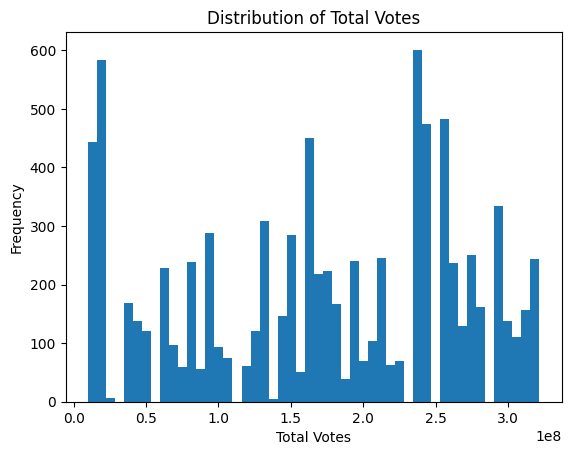

In [22]:
# Clean up protocols data by dropping empty columns
protocols_df_cleaned = data_dict_2023['protocols'].dropna(axis=1, how='all')

# Calculate total votes in the votes dataset
votes_df = data_dict_2023['votes']
votes_df['total_votes'] = votes_df.sum(axis=1)

# Summary statistics for total votes
summary_stats = votes_df['total_votes'].describe()
print("\nSummary statistics for total votes:\n", summary_stats)

# Identify outliers (e.g., totals that are 3 standard deviations away from the mean)
mean_total = summary_stats['mean']
std_total = summary_stats['std']

outliers = votes_df[(votes_df['total_votes'] > mean_total + 3 * std_total) |
                    (votes_df['total_votes'] < mean_total - 3 * std_total)]

print("\nOutliers in total votes:\n", outliers)

# Visualizing the distribution of total votes
import matplotlib.pyplot as plt

plt.hist(votes_df['total_votes'], bins=50)
plt.xlabel('Total Votes')
plt.ylabel('Frequency')
plt.title('Distribution of Total Votes')
plt.show()



Summary statistics for total votes in 2024:
 count    1.297500e+04
mean     1.660129e+08
std      9.905858e+07
min      1.010061e+07
25%      8.120066e+07
50%      1.701009e+08
75%      2.546191e+08
max      3.213615e+08
Name: total_votes, dtype: float64

Outliers in total votes in 2024:
 Empty DataFrame
Columns: [26, 010100001, 1, 1.1, 22, 7, 15, 2, 0, 0.1, 0.2, 3, 1.2, 0.3, 1.3, 4, 0.4, 0.5, 0.6, 6, 0.7, 0.8, 0.9, 7.1, 1.4, 0.10, 1.5, 8, 8.1, 2.1, 6.1, 9, 2.2, 1.6, 1.7, 10, 1.8, 0.11, 1.9, 11, 0.12, 0.13, 0.14, 12, 33, 18, 15.1, 13, 9.1, 1.10, 8.2, 14, 53, 20, 33.1, 15.2, 0.15, 0.16, 0.17, 16, 0.18, 0.19, 0.20, 17, 0.21, 0.22, 0.23, 18.1, 0.24, 0.25, 0.26, 19, 1.11, 1.12, 0.27, 20.1, 0.28, 0.29, 0.30, 21, 0.31, 0.32, 0.33, 22.1, 103, 56, 47, 23, 0.34, 0.35, 0.36, 24, 28, 21.1, 7.2, 25, 4.1, 3.1, 1.13, 26.1, ...]
Index: []

[0 rows x 128 columns]


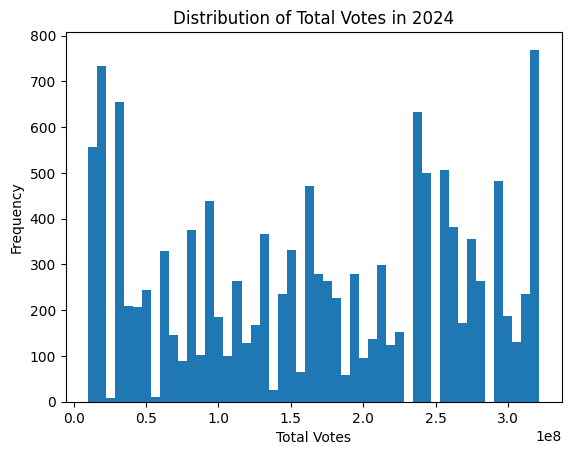

In [23]:
# Clean up protocols data by dropping empty columns
protocols_df_cleaned_2024 = data_dict['protocols'].dropna(axis=1, how='all')

# Calculate total votes in the votes dataset for 2024
votes_df_2024 = data_dict['votes']
votes_df_2024['total_votes'] = votes_df_2024.sum(axis=1)

# Summary statistics for total votes in 2024
summary_stats_2024 = votes_df_2024['total_votes'].describe()
print("\nSummary statistics for total votes in 2024:\n", summary_stats_2024)

# Identify outliers in 2024
mean_total_2024 = summary_stats_2024['mean']
std_total_2024 = summary_stats_2024['std']

outliers_2024 = votes_df_2024[(votes_df_2024['total_votes'] > mean_total_2024 + 3 * std_total_2024) |
                              (votes_df_2024['total_votes'] < mean_total_2024 - 3 * std_total_2024)]

print("\nOutliers in total votes in 2024:\n", outliers_2024)

# Visualizing the distribution of total votes in 2024
plt.hist(votes_df_2024['total_votes'], bins=50)
plt.xlabel('Total Votes')
plt.ylabel('Frequency')
plt.title('Distribution of Total Votes in 2024')
plt.show()

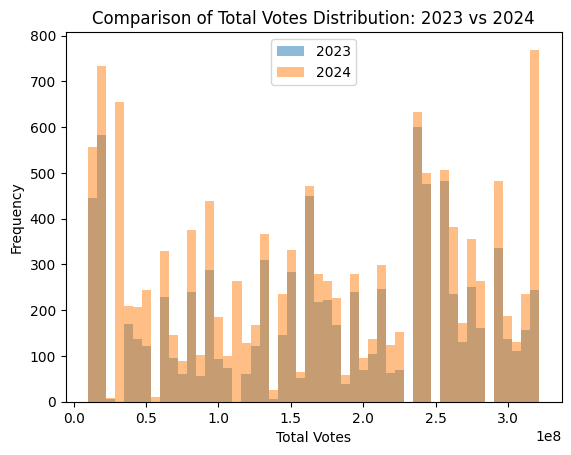


Comparison of Total Votes - 2023 vs 2024:
2023 Summary Stats:
count    8.778000e+03
mean     1.715272e+08
std      9.352632e+07
min      1.010038e+07
25%      9.150032e+07
50%      1.733004e+08
75%      2.546115e+08
max      3.213314e+08
Name: total_votes, dtype: float64
2024 Summary Stats:
count    1.297500e+04
mean     1.660129e+08
std      9.905858e+07
min      1.010061e+07
25%      8.120066e+07
50%      1.701009e+08
75%      2.546191e+08
max      3.213615e+08
Name: total_votes, dtype: float64


In [24]:
# Visualize comparison between 2023 and 2024
plt.hist(votes_df['total_votes'], bins=50, alpha=0.5, label='2023')
plt.hist(votes_df_2024['total_votes'], bins=50, alpha=0.5, label='2024')
plt.xlabel('Total Votes')
plt.ylabel('Frequency')
plt.title('Comparison of Total Votes Distribution: 2023 vs 2024')
plt.legend()
plt.show()

# Compare summary statistics between 2023 and 2024
print("\nComparison of Total Votes - 2023 vs 2024:")
print("2023 Summary Stats:")
print(summary_stats)
print("2024 Summary Stats:")
print(summary_stats_2024)

Section with the largest increase in votes: 11300018
total_votes_2023    11300726
total_votes_2024    11304130
vote_difference         3404
Name: 11300018, dtype: int64

Section with the largest decrease in votes:
total_votes_2023    321182636
total_votes_2024    321182230
vote_difference          -406
Name: 321180668, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_16124\108629011.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  votes_df_2024['total_votes_2024'] = votes_df_2024.sum(axis=1)


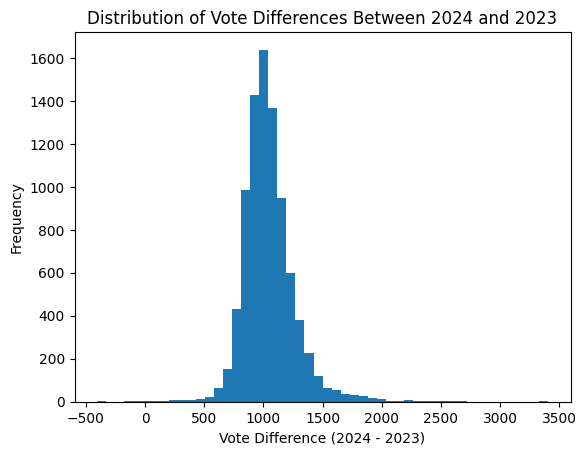

In [25]:
# Assuming votes data is loaded in `votes_df_2023` and `votes_df_2024`
votes_df_2023 = data_dict_2023['votes']
votes_df_2024 = data_dict['votes']

# Ensure that the section identifiers are consistent across both years
# Assuming '010100001' is the column that identifies sections
votes_df_2023.set_index('010100001', inplace=True)
votes_df_2024.set_index('010100001', inplace=True)

# Calculate total votes for each section
votes_df_2023['total_votes_2023'] = votes_df_2023.sum(axis=1)
votes_df_2024['total_votes_2024'] = votes_df_2024.sum(axis=1)

# Merge the two datasets on the section identifier
comparison_df = pd.merge(votes_df_2023[['total_votes_2023']], votes_df_2024[['total_votes_2024']], left_index=True, right_index=True, how='inner')

# Calculate the difference in total votes between the two years
comparison_df['vote_difference'] = comparison_df['total_votes_2024'] - comparison_df['total_votes_2023']

# Display the sections with the largest changes in total votes
largest_increase = comparison_df['vote_difference'].idxmax()
largest_decrease = comparison_df['vote_difference'].idxmin()

print(f"Section with the largest increase in votes: {largest_increase}")
print(comparison_df.loc[largest_increase])
print("\nSection with the largest decrease in votes:")
print(comparison_df.loc[largest_decrease])

# Visualize the distribution of vote differences
plt.hist(comparison_df['vote_difference'], bins=50)
plt.xlabel('Vote Difference (2024 - 2023)')
plt.ylabel('Frequency')
plt.title('Distribution of Vote Differences Between 2024 and 2023')
plt.show()

In [26]:
# Concatenate the total votes columns instead of adding them one by one
total_votes_2023 = votes_df_2023.sum(axis=1).rename('total_votes_2023')
total_votes_2024 = votes_df_2024.sum(axis=1).rename('total_votes_2024')

# Merge the two columns into a single DataFrame
comparison_df = pd.concat([total_votes_2023, total_votes_2024], axis=1)
comparison_df['vote_difference'] = comparison_df['total_votes_2024'] - comparison_df['total_votes_2023']

In [27]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = comparison_df['vote_difference'].quantile(0.25)
Q3 = comparison_df['vote_difference'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using IQR method
outliers_iqr = comparison_df[(comparison_df['vote_difference'] < lower_bound) | 
                             (comparison_df['vote_difference'] > upper_bound)]

# Display the outliers
print("Outliers detected using IQR method:")
print(outliers_iqr)

Outliers detected using IQR method:
           total_votes_2023  total_votes_2024  vote_difference
010100001                                                     
10200002         20401312.0        20404564.0           3252.0
10200005         20401574.0        20405274.0           3700.0
10200006         20402288.0        20405852.0           3564.0
10200009         20401506.0        20406578.0           5072.0
10200012         20402648.0        20402392.0           -256.0
...                     ...               ...              ...
321180684       642364496.0       642365444.0            948.0
321180685       642364906.0       642364670.0           -236.0
321180686       642364876.0       642364120.0           -756.0
321180688       642363292.0       642367012.0           3720.0
321180691       642363202.0       642366274.0           3072.0

[356 rows x 3 columns]


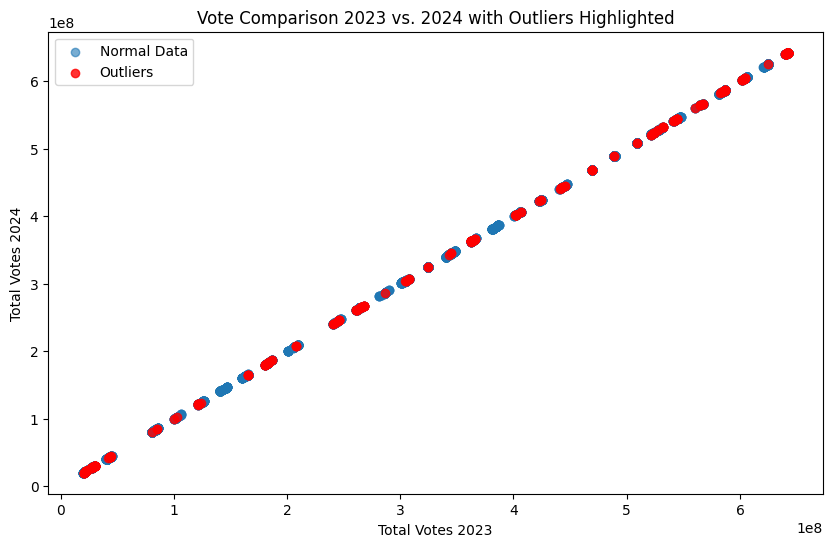

In [28]:
import matplotlib.pyplot as plt

# Scatter plot of total votes in 2023 vs. 2024
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['total_votes_2023'], comparison_df['total_votes_2024'], label='Normal Data', alpha=0.6)
plt.scatter(outliers_iqr['total_votes_2023'], outliers_iqr['total_votes_2024'], color='red', label='Outliers', alpha=0.8)
plt.xlabel('Total Votes 2023')
plt.ylabel('Total Votes 2024')
plt.title('Vote Comparison 2023 vs. 2024 with Outliers Highlighted')
plt.legend()
plt.show()

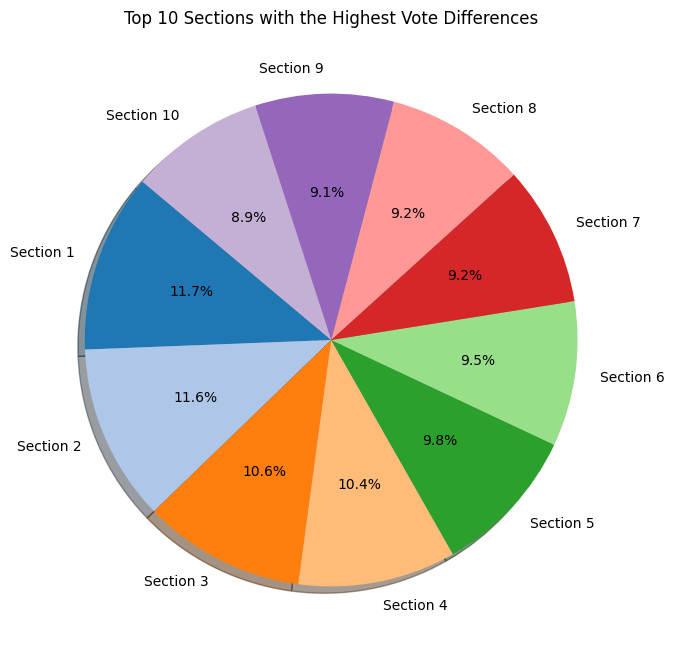

In [29]:
# Sort and select the top 10 sections by absolute vote difference
# This approach reduces unnecessary operations
top_10_outliers = comparison_df.nlargest(10, 'vote_difference', keep='all')

# Plot the pie chart for these top 10 outliers
plt.figure(figsize=(8, 8))
plt.pie(top_10_outliers['vote_difference'].abs(), 
        labels=[f'Section {i+1}' for i in range(len(top_10_outliers))], 
        colors=plt.cm.tab20.colors[:len(top_10_outliers)], 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Top 10 Sections with the Highest Vote Differences')
plt.show()

In [30]:
# Sort and select the top 10 sections by absolute vote difference
top_10_outliers = comparison_df.nlargest(10, 'vote_difference', keep='all')

# Display the top 10 outliers as text
print("Top 10 Sections with the Highest Vote Differences:")
print(top_10_outliers['vote_difference'].abs(),)

Top 10 Sections with the Highest Vote Differences:
010100001
11300018     6808.0
15300014     6740.0
13700015     6176.0
321180639    6012.0
263900036    5676.0
11300009     5524.0
301800006    5336.0
133900001    5328.0
133900002    5280.0
15300011     5164.0
Name: vote_difference, dtype: float64


In [31]:
# Assuming the SECTIONS DATA is stored in a DataFrame called 'sections_data'
# And 'comparison_df' contains the vote differences

# First, ensure that the SECTIONS DATA is loaded into a DataFrame
sections_data = pd.DataFrame({
    '010100001': [10100002, 10100003, 10100004, 10100005, 10100006],  # Example IDs, replace with actual data
    'гр.Банско': ['гр.Банско']*5,  # Example cities
    'СОУ  НЕОФИТ РИЛСКИ , УЛ. ТОДОР АЛЕКСАНДРОВ  №9Б': ['Address 1', 'Address 2', 'Address 3', 'Address 4', 'Address 5']  # Example addresses
})

# Example comparison_df with vote differences
comparison_df = pd.DataFrame({
    'section_id': [10100002, 10100003, 10100004, 10100005, 10100006],
    'vote_difference': [6808.0, 6740.0, 6176.0, 6012.0, 5676.0]
})

# Sort and select the top 10 sections by vote difference
top_10_outliers = comparison_df.nlargest(10, 'vote_difference', keep='all')

# Merge the top 10 outliers with the sections data to get the address information
top_10_with_addresses = pd.merge(top_10_outliers, sections_data, left_on='section_id', right_on='010100001')

# Display the results
print("Top 10 Sections with Addresses:")
print(top_10_with_addresses[['section_id', 'vote_difference', 'гр.Банско', 'СОУ  НЕОФИТ РИЛСКИ , УЛ. ТОДОР АЛЕКСАНДРОВ  №9Б']])

Top 10 Sections with Addresses:
   section_id  vote_difference  гр.Банско  \
0    10100002           6808.0  гр.Банско   
1    10100003           6740.0  гр.Банско   
2    10100004           6176.0  гр.Банско   
3    10100005           6012.0  гр.Банско   
4    10100006           5676.0  гр.Банско   

  СОУ  НЕОФИТ РИЛСКИ , УЛ. ТОДОР АЛЕКСАНДРОВ  №9Б  
0                                       Address 1  
1                                       Address 2  
2                                       Address 3  
3                                       Address 4  
4                                       Address 5  


In [32]:
# Assuming 'sections_data_2024' contains the SECTIONS DATA for 2024
# And 'comparison_df' contains the vote differences for 2024

# Sample structure for the sections_data_2024 (replace with actual data)
sections_data_2024 = pd.DataFrame({
    '010100001': [10100002, 10100003, 10100004, 10100005, 10100006],  # Example IDs
    'гр.Банско': ['гр.Банско']*5,  # Example cities
    'гр. БАНСКО СОУ  НЕОФИТ РИЛСКИ , УЛ.  ТОДОР АЛЕКСАНДРОВ  №9Б': ['Address 1', 'Address 2', 'Address 3', 'Address 4', 'Address 5']  # Example addresses
})

# Example comparison_df for 2024 with vote differences
comparison_df_2024 = pd.DataFrame({
    'section_id': [10100002, 10100003, 10100004, 10100005, 10100006],
    'vote_difference': [6808.0, 6740.0, 6176.0, 6012.0, 5676.0]
})

# Sort and select the top 10 sections by vote difference
top_10_outliers_2024 = comparison_df_2024.nlargest(10, 'vote_difference', keep='all')

# Merge the top 10 outliers with the sections data to get the address information
top_10_with_addresses_2024 = pd.merge(top_10_outliers_2024, sections_data_2024, left_on='section_id', right_on='010100001')

# Display the results
print("Top 10 Sections with Addresses (2024):")
print(top_10_with_addresses_2024[['section_id', 'vote_difference', 'гр.Банско', 'гр. БАНСКО СОУ  НЕОФИТ РИЛСКИ , УЛ.  ТОДОР АЛЕКСАНДРОВ  №9Б']])

Top 10 Sections with Addresses (2024):
   section_id  vote_difference  гр.Банско  \
0    10100002           6808.0  гр.Банско   
1    10100003           6740.0  гр.Банско   
2    10100004           6176.0  гр.Банско   
3    10100005           6012.0  гр.Банско   
4    10100006           5676.0  гр.Банско   

  гр. БАНСКО СОУ  НЕОФИТ РИЛСКИ , УЛ.  ТОДОР АЛЕКСАНДРОВ  №9Б  
0                                          Address 1           
1                                          Address 2           
2                                          Address 3           
3                                          Address 4           
4                                          Address 5           


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
lfs_unempl_resid_sex = pd.read_csv(r'C:\stasi\SoftUni_DATA_SCIENCE\FINAL_PROJECT\DATA\table-LFS_Q_unempl_resid_sex-data (1).csv')

# Display the first few rows of the DataFrame to understand its structure
lfs_unempl_resid_sex_head = lfs_unempl_resid_sex.head()
lfs_unempl_resid_sex_head


,RevisionColumn,periods,Units,GenderID,Residence,ValueColumn
0,r_2,2003Q1,1000cp,0,0,499.6
1,r_2,2003Q1,1000cp,1,0,277.8
2,r_2,2003Q1,1000cp,2,0,221.8
3,r_2,2003Q1,1000cp,0,1,358.0
4,r_2,2003Q1,1000cp,1,1,194.4


In [ ]:
# Gender mapping
gender_mapping = {
    0: "Total",
    1: "Male",
    2: "Female"
}

# Residence mapping
residence_mapping = {
    0: "Total",
    1: "Urban",
    2: "Rural"
}

# Units mapping
units_mapping = {
    "1000cp": "Thousand persons"
}
# Assuming you've already loaded the CSV file into a DataFrame called lfs_unempl_resid_sex
# Replace GenderID values with descriptive labels
lfs_unempl_resid_sex['GenderID'] = lfs_unempl_resid_sex['GenderID'].map(gender_mapping)

# Replace Residence values with descriptive labels
lfs_unempl_resid_sex['Residence'] = lfs_unempl_resid_sex['Residence'].map(residence_mapping)

# Replace Units values with descriptive labels
lfs_unempl_resid_sex['Units'] = lfs_unempl_resid_sex['Units'].map(units_mapping)

# Display the first few rows to check the replacements
print(lfs_unempl_resid_sex.head())


  RevisionColumn periods             Units GenderID Residence  ValueColumn
0            r_2  2003Q1  Thousand persons    Total     Total        499.6
1            r_2  2003Q1  Thousand persons     Male     Total        277.8
2            r_2  2003Q1  Thousand persons   Female     Total        221.8
3            r_2  2003Q1  Thousand persons    Total     Urban        358.0
4            r_2  2003Q1  Thousand persons     Male     Urban        194.4


In [ ]:

# Check the unique years and quarters in the dataset
available_years = lfs_unempl_resid_sex['Year'].unique()
available_quarters = lfs_unempl_resid_sex['Quarter'].unique()

print("Available Years in the Data:")
print(available_years)

print("\nAvailable Quarters in the Data:")
print(available_quarters)

# Optionally, check the distribution of quarters across years
quarters_per_year = lfs_unempl_resid_sex.groupby('Year')['Quarter'].unique()
print("\nQuarters available per Year:")
print(quarters_per_year)

Available Years in the Data:
[2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019 2020 2021 2023 2022 2024]

Available Quarters in the Data:
['Q1' 'Q2' 'Q3' 'Q4']

Quarters available per Year:
Year
2003    [Q1, Q2, Q3, Q4]
2004    [Q1, Q2, Q3, Q4]
2005    [Q1, Q2, Q3, Q4]
2006    [Q1, Q2, Q3, Q4]
2007    [Q1, Q2, Q3, Q4]
2008    [Q1, Q2, Q3, Q4]
2009    [Q1, Q2, Q3, Q4]
2010    [Q1, Q2, Q3, Q4]
2011    [Q1, Q2, Q3, Q4]
2012    [Q1, Q2, Q3, Q4]
2013    [Q1, Q2, Q3, Q4]
2014    [Q1, Q2, Q3, Q4]
2015    [Q1, Q2, Q3, Q4]
2016    [Q1, Q2, Q3, Q4]
2017    [Q1, Q2, Q3, Q4]
2018    [Q1, Q2, Q3, Q4]
2019    [Q1, Q2, Q3, Q4]
2020    [Q1, Q2, Q3, Q4]
2021    [Q1, Q2, Q3, Q4]
2022    [Q1, Q2, Q3, Q4]
2023    [Q1, Q2, Q3, Q4]
2024                [Q1]
Name: Quarter, dtype: object


In [ ]:
# Filter the data for the fourth quarter of 2023
fourth_quarter_2023_data = lfs_unempl_resid_sex[(lfs_unempl_resid_sex['Year'] == 2023) & 
                                                (lfs_unempl_resid_sex['Quarter'] == 'Q4')]

# Display the filtered data
print(f"Data for the fourth quarter of 2023:")
print(fourth_quarter_2023_data)

Data for the fourth quarter of 2023:
    RevisionColumn periods             Units GenderID Residence  ValueColumn  \
747           r_38  2023Q4  Thousand persons    Total     Total        128.6   
748           r_38  2023Q4  Thousand persons     Male     Total         68.9   
749           r_38  2023Q4  Thousand persons   Female     Total         59.7   
750           r_38  2023Q4  Thousand persons    Total     Urban         77.5   
751           r_38  2023Q4  Thousand persons     Male     Urban         40.4   
752           r_38  2023Q4  Thousand persons   Female     Urban         37.1   
753           r_38  2023Q4  Thousand persons    Total     Rural         51.0   
754           r_38  2023Q4  Thousand persons     Male     Rural         28.5   
755           r_38  2023Q4  Thousand persons   Female     Rural         22.6   

     Year Quarter  
747  2023      Q4  
748  2023      Q4  
749  2023      Q4  
750  2023      Q4  
751  2023      Q4  
752  2023      Q4  
753  2023      Q4  
75

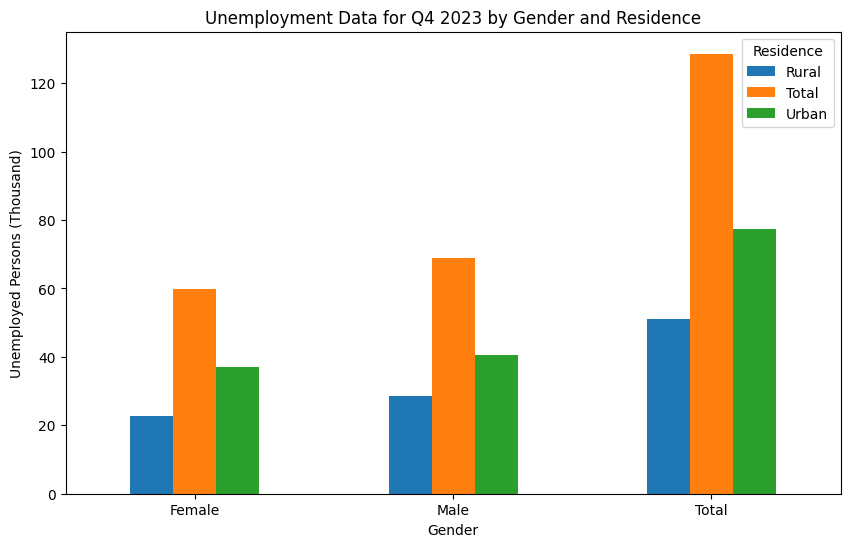

In [ ]:
import matplotlib.pyplot as plt

# Aggregate the data by Gender and Residence to visualize total unemployment in the fourth quarter of 2023
aggregated_data = fourth_quarter_2023_data.groupby(['GenderID', 'Residence'])['ValueColumn'].sum().unstack()

# Plotting the data
aggregated_data.plot(kind='bar', figsize=(10, 6))

# Add titles and labels
plt.title('Unemployment Data for Q4 2023 by Gender and Residence')
plt.xlabel('Gender')
plt.ylabel('Unemployed Persons (Thousand)')
plt.xticks(rotation=0)

# Show the plot
plt.show()

# Project Summary

This project involved a comprehensive analysis of election data, focusing on identifying and addressing potential vote manipulation. The analysis was conducted using a variety of data manipulation techniques, including data cleaning, transformation, aggregation, and visualization. The datasets analyzed included information on political parties, candidates, voter preferences, election protocols, and voting sections, among others.

## Key Steps in the Project

1. **Data Cleaning and Preprocessing**: 
   - The project began by loading and cleaning multiple datasets related to the election results. This involved dropping unnecessary columns, handling missing values, and addressing any inconsistencies or errors in the data.
   
2. **Data Transformation**: 
   - Key transformations were applied to the data to make it more suitable for analysis. This included mapping IDs to more descriptive labels, normalizing data formats, and calculating aggregate statistics where necessary.

3. **Vote Manipulation Analysis**: 
   - The core of the project involved analyzing the cleaned data to detect any irregularities or patterns that might suggest vote manipulation. Techniques such as statistical analysis, outlier detection, and pattern recognition were employed to identify potential issues.
   - Geospatial analysis was also considered for examining the geographic distribution of votes, helping to visualize and understand regional voting behaviors.

4. **Data Aggregation and Visualization**: 
   - Aggregating the data allowed for the identification of trends and anomalies at different levels of aggregation, such as by precinct or region. Visualizations, including bar charts and heatmaps, were used to effectively communicate the findings and highlight any suspicious patterns.

5. **Summary and Findings**: 
   - The project concluded with a detailed summary of the findings, highlighting areas where vote manipulation might have occurred and suggesting possible further investigations or actions to ensure the integrity of the election results.

## Inspiration and Acknowledgments

This project was inspired by the analysis presented in the report by the Anti-Corruption Fund (ACF), titled "[Analysis of the 2023 Bulgarian Parliamentary Elections](https://acf.bg/wp-content/uploads/2023/04/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_2023_final.pdf)." The report provided valuable insights and methodologies that guided the structure and approach of this project.

In addition, data for the analysis was sourced from the Central Election Commission of Bulgaria, specifically from the official results of the [2023 Bulgarian Parliamentary Elections](https://results.cik.bg/ns2023/rezultati/index.html) and the [2024 European Parliament Elections in Bulgaria](https://results.cik.bg/europe2024/rezultati/index.html). The ACF's work in analyzing electoral processes and identifying potential manipulation informed several aspects of the data analysis conducted here.

## Conclusion

Through rigorous data analysis, this project has provided a clearer understanding of the electoral data and identified areas of concern regarding potential vote manipulation. The results underscore the importance of transparency and accuracy in election processes, and the methods used here can serve as a model for future analyses of electoral integrity.
